## Libraies

필요한 module들 import 하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load data

In [3]:
#함께 첨부한 엑셀 데이터 파일의 경로

PATH = '/content/drive/MyDrive/high_diamond_ranked_10min.csv'

In [4]:
game_data = pd.read_csv(PATH)
game_data.info()
game_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## Data Analysis

지표와 승리 간의 관계 그래프로 나타내보기

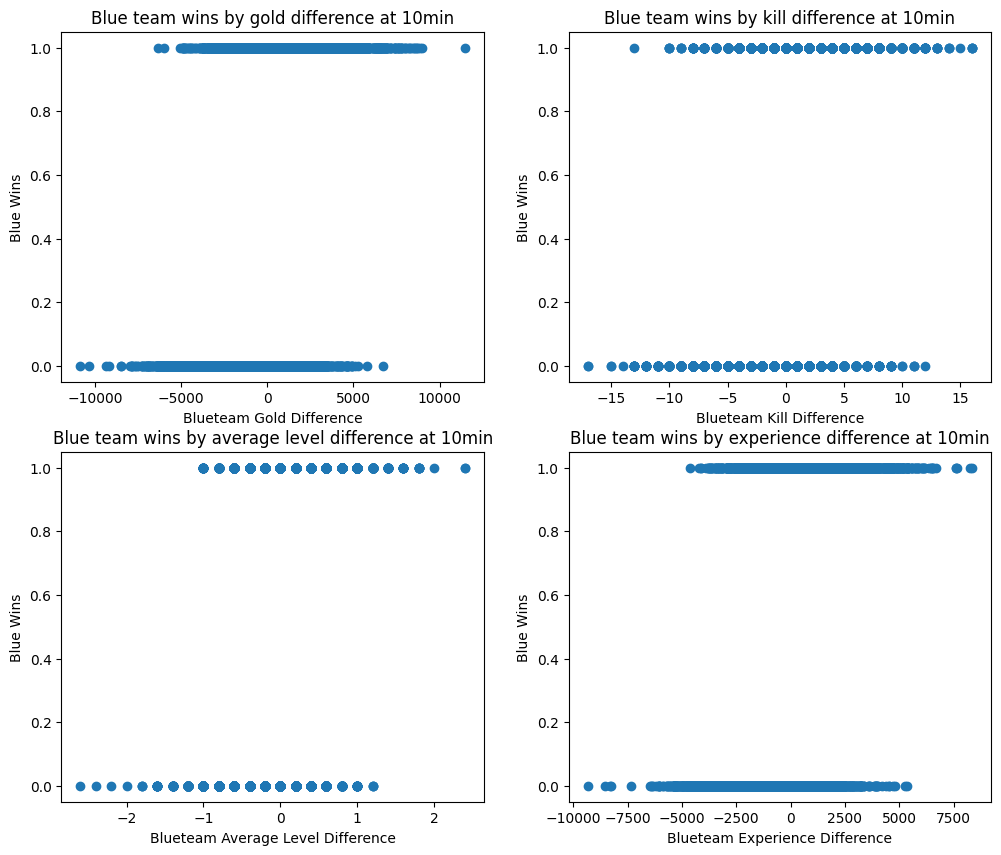

In [5]:
#수급 골드 총량, 수급 경험치 총량, 선취점 여부, 총 득점(킬 수)차이
#엘리트 몬스터 사냥 수, 상대팀과의 평균레벨 차이와 승리간의 관계

KillDiff = []
for i in range(len(game_data)):
    KD = (game_data['blueKills'][i])-game_data['blueDeaths'][i]
    KillDiff.append(KD)

GoldDiff = [game_data['blueGoldDiff']]
ExpDiff = [game_data['blueExperienceDiff']]
AvgLevelDiff = [game_data['blueAvgLevel'][i]-game_data['redAvgLevel'][i] for i in range(len(game_data))]
y = list(game_data['blueWins'])

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(GoldDiff, y)
plt.xlabel('Blueteam Gold Difference')
plt.ylabel('Blue Wins')
plt.title('Blue team wins by gold difference at 10min')

plt.subplot(2,2,2)
plt.scatter(KillDiff, y)
plt.xlabel('Blueteam Kill Difference')
plt.ylabel('Blue Wins')
plt.title('Blue team wins by kill difference at 10min')

plt.subplot(2,2,3)
plt.scatter(AvgLevelDiff, y)
plt.xlabel('Blueteam Average Level Difference')
plt.ylabel('Blue Wins')
plt.title('Blue team wins by average level difference at 10min')

plt.subplot(2,2,4)
plt.scatter(ExpDiff, y)
plt.xlabel('Blueteam Experience Difference')
plt.ylabel('Blue Wins')
plt.title('Blue team wins by experience difference at 10min')
plt.show()

0.39856477889837083 0.5863443807625218 0.7352112676056338


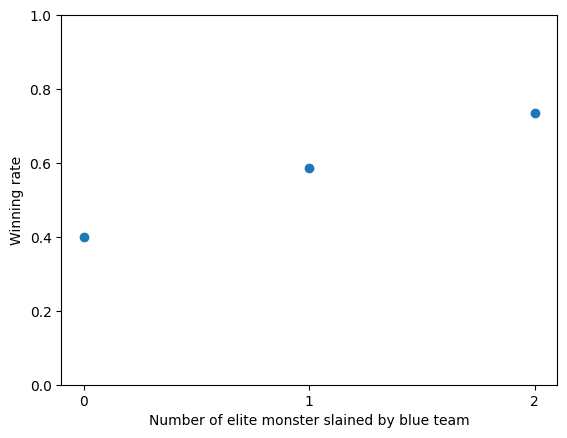

In [6]:
result = [0 for i in range(6)]
x = list(game_data['blueEliteMonsters'])
y = list(game_data['blueWins'])
for t in zip(x, y):
    if t == (0, 0):
        result[0] += 1
    elif t == (1, 0):
        result[1] += 1
    elif t == (0, 1):
        result[3] += 1
    elif t == (2, 1):
        result[5] += 1
    elif t == (2, 0):
        result[2] += 1
    elif t == (1, 1):
        result[4] += 1

#엘리트 몬스터를 많이 잡을수록 승리확률이 올라가는지를 확인
a = result[3]/(result[0]+result[3])
b = result[4]/(result[1]+result[4])
c = result[5]/(result[2]+result[5])

print(a, b, c)

plt.scatter([0,1,2],[a,b,c])
plt.ylim(0,1)
plt.xticks([0,1,2],[0,1,2])
plt.xlabel('Number of elite monster slained by blue team')
plt.ylabel('Winning rate')
plt.show()

In [7]:
#새로 만들어낸 데이터를 기존 데이터에 추가
game_data['blueKillDiff'] = KillDiff
game_data['blueAvgLevelDiff'] = AvgLevelDiff

## Model

Decision Tree 를 이용하여 예측하기

In [22]:
inputData = game_data[['blueGoldDiff', 'blueExperienceDiff', 'blueFirstBlood', 'blueEliteMonsters', 'blueKillDiff', 'blueAvgLevelDiff']].to_numpy()
target = game_data['blueWins'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(inputData, target, test_size=0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 8) #maxdepth 는 hyperparameter
dt.fit(train_input, train_target)
print('Train Score : ',dt.score(train_input, train_target))
print('Test Score : ', dt.score(test_input, test_target))

Train Score :  0.7593318992787549
Test Score :  0.715080971659919


## Result

Decision Tree 구성 및 지표 간 중요도 알아보기

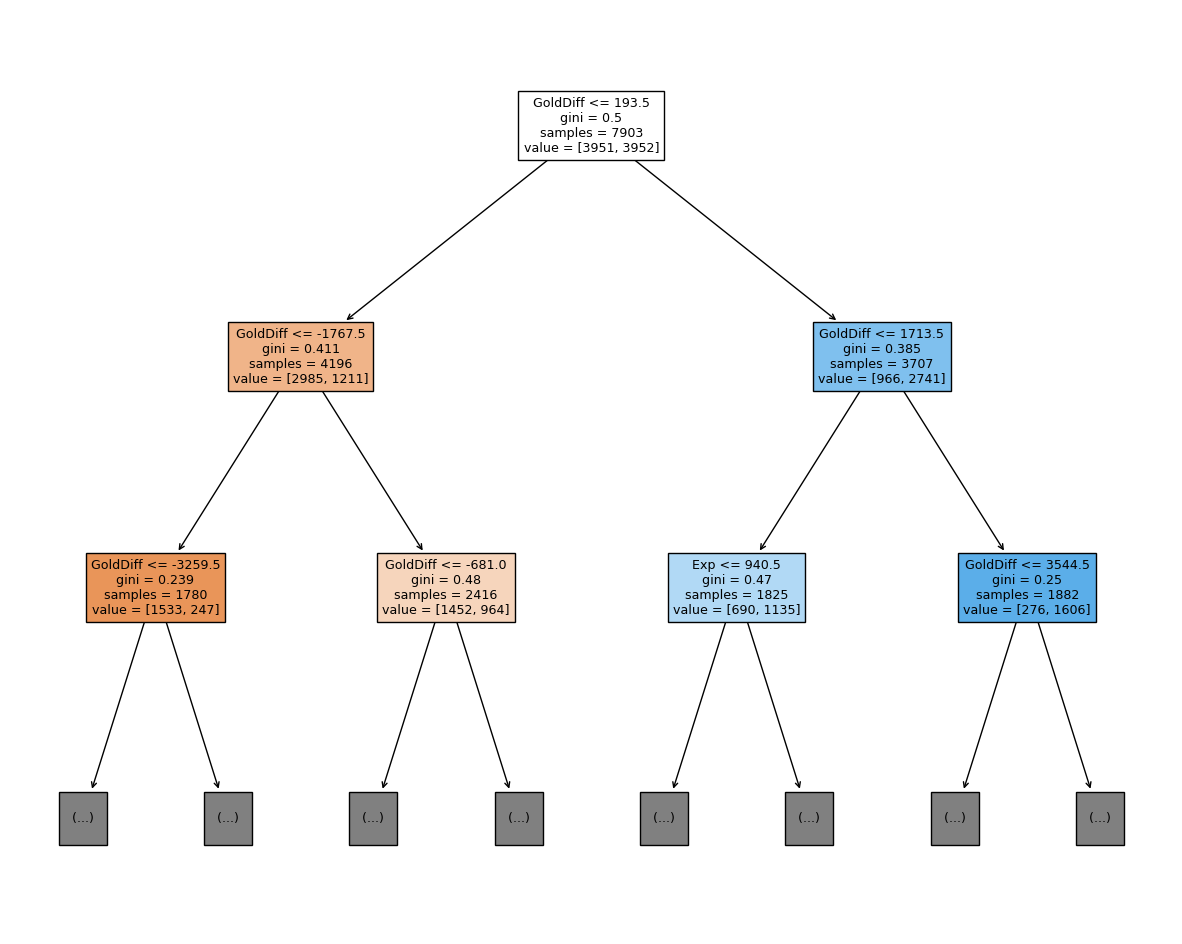

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15,12))
plot_tree(dt, max_depth = 2, filled = True, feature_names = ['GoldDiff', 'Exp', 'FirstBlood', 'EliteMonsters', 'KillDiff', 'AvgLevelDiff'])
plt.show()

In [12]:
#importance 확인해보기
print(dt.feature_importances_)

[0.84846463 0.07737986 0.00335695 0.02220284 0.02916817 0.01942755]


In [26]:
questions = ["Gold difference of your team at 10min : ",
             "\nExperience difference of your team at 10min : ",
             "\nDo your team get Firstblood at this game? (Yes : 1, No : 0) : ",
             "\nThe number of elite monsters slained by your team before 10min : ",
             "\nKill difference of your team at 10min : ",
             "\nAverage level difference of your team at 10min : "]

testx = []
for i in range(len(questions)):
  temp = int(input(questions[i]))
  testx.append(temp)

testy = dt.predict([testx])

if testy == 1:
  print("\nYour team will win!")
else:
  print("\nYour team will lose!")




Gold difference of your team at 10min : -1348

Experience difference of your team at 10min : -1332

Do your team get Firstblood at this game? (Yes : 1, No : 0) : 1

The number of elite monsters slained by your team before 10min : 0

Kill difference of your team at 10min : -5

Average level difference of your team at 10min : 0

Your team will lose!
